# Лабораторная работа No6
# Кластеризация (DBSCAN, OPTICS)


## Загрузка данных

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## DBSCAN

Проведем кластеризацию методов k-средних


In [3]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)


KMeans(n_clusters=3, n_init=15)

Так как разные признаки лежат в разных шкалах, то стандартизируем данные


In [4]:
from sklearn import preprocessing

data = np.array(data, dtype='float')

min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)


Проведем кластеризацию методов [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) при параметрах по умолчанию. Выведем
метки кластеров, количество кластеров, а также процент наблюдений, которые
кластеризовать не удалось


In [5]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


Параметры принимаемые DBSCAN:

- eps - максимальная дистанция между двумя точками (сэмплами), допустимая для того, чтобы можно было бы сказать, что они соседи
- min_samples - минимальное количество точек соседей, включая её саму, необходимое для того, чтобы эту точку можно было бы назвать `core` (т.е. внутри кластера)
- metrics - метрика для вычисление расстояний между двумя точками (по-умолчанию, расстояние в Евклидовом пространстве)
- metric_params - параметры для метрики
- algorithm - алгоритм для вычисления ближайших соседей модулем NearestNeighbors
- leaf_size - количество листьев для некоторых алгоритмов в вышеказанном параметре
- p - мощность метрики Миковского (если таковая указана в metrics)
- n_jobs - количество паралельных работ для расчетов

Постройте график количества кластеров и процента не кластеризованных наблюдений
в зависимости от максимальной рассматриваемой дистанции между наблюдениями (EPS).
Минимальное значение количества точек образующих кластер оставить по
умолчанию


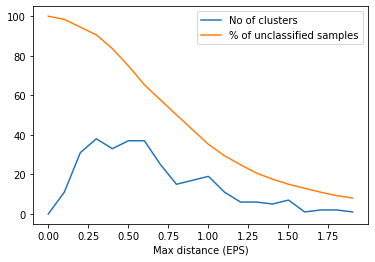

In [6]:
import matplotlib.pyplot as plt

eps_range = np.arange(0.001, 2, 0.1)

clust_n = []
clust_failure = []

for eps in eps_range:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))
    
plt.xlabel("Max distance (EPS)")
plt.plot(eps_range, clust_n, label="No of clusters")
plt.plot(eps_range, clust_failure, label='% of unclassified samples')
plt.legend()
plt.show()

Постройте график количества кластеров и процента не кластеризованных наблюдений
в зависимости от минимального значения количества точек, образующих кластер.
Максимальную рассматриваемую дистанцию между наблюдениями оставьте по
умолчанию


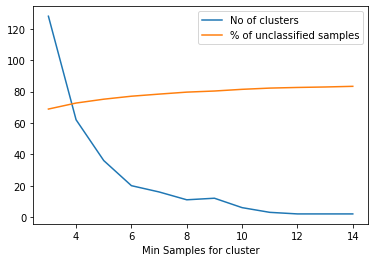

In [7]:
min_samples_range = range(3, 15)

clust_n = []
clust_failure = []

for min_samples in min_samples_range:
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

plt.xlabel("Min Samples for cluster")
plt.plot(min_samples_range, clust_n, label="No of clusters")
plt.plot(min_samples_range, clust_failure, label='% of unclassified samples')
plt.legend()
plt.show()



Определите значения параметров, при котором количество кластеров получается от 5
до 7, и процент не кластеризованных наблюдений не превышает 12%.


In [8]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)
print(f'Clusters: {len(set(clustering.labels_)) - 1}')
print(f'% of u.s.: {100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_))}')

Clusters: 6
% of u.s.: 6.287633163501621


Понизьте размерность данных до 2 при используя метод главных компонент.
Визуализируйте результаты кластеризации полученные в пункте 6 (метки должны быть
получены на данных до уменьшения размерности). [гайд по визуализации](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)


0 8077
1 3
2 3
3 3
4 3
5 4
-1 543
[-1, 0, 1, 2, 3, 4, 5]


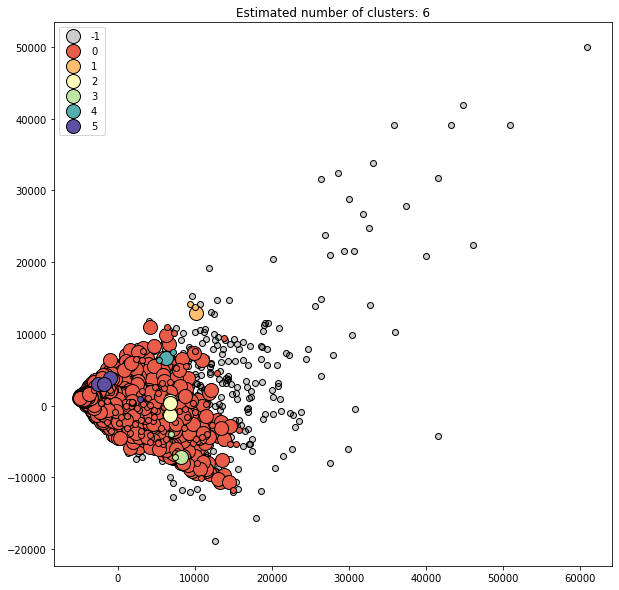

In [9]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)

core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

for label in set(clustering.labels_):
    print(label, np.count_nonzero(clustering.labels_ == label))

labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]

print(unique_labels)

from sklearn.decomposition import PCA
from matplotlib.pyplot import cm

reduced_data = PCA(n_components=2).fit_transform(data)

plt.rcParams['figure.figsize'] = (10, 10)


colors = [cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 0.2]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=k)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.legend()
plt.show()



## OPTICS

Опишите параметры метода [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS), а также какими атрибутами он обладает


#### Параметры

- min_samples - минимальное количество точек в окрестности другой точки, чтобы считать её "core"-точкой;
    
- max_eps - максимальное расстояние между двумя точками для того, чтобы считать их в окрестности друг друга. По умолчанию - бесконечность;
    
- metric - метрика для вычисления расстояния;

- p - параметр для метрики Минковского;

- metric_params - дополнительные параметры метрики;

- cluster_method - метод для извлечения кластеров с импользованием вычисленных "reachability" и "ordereing". Может быть “xi” или “dbscan”;

- eps - (параметр dbscan) максимальная дистанция между точками, чтобы считать их в окресности друг друга. По-умолчанию такое же как и max_eps.

- xi - параметр для метода "xi". Опеределяет минимальную ступенчатость графика достижимости (reachability plot), которая определяет границу кластера. 
    
- predecessor_correction - параметр для метода "xi", который позволяет корректировать кластеры в соответсвии с предшественниками.

- min_cluster_size - мимнимальный размер OPTICS кластера в количестве измерений. 
    
- algorithm - алгоритм для вычисления ближайших соседей;

- leaf_size - размер листа дерева для BallTree или KDTree. 

- n_jobs - количество параллельных работ для поиска соседей.

#### Атрибуты

- labels_ - метки кластеров

- reachability_ - reachability distances для каждой точки;

- ordering_ - индексы точке отсортированные в порядке кластеров;

- core_distances_ - дистанции на которых каждая точка стоановится core-точкой. Для некорневых точек - бесконечность.
    
- predecessor_ - точка из которой была достигнута точка.

- cluster_hierarchy_ - иерархия класткров. Только для xi метода.



Найдите такие параметры метода OPTICS (*max_eps *и min_samples) при которых, чтобы
получить результаты близкие к результатам DBSCAN из пункта 6


In [11]:
from sklearn.cluster import OPTICS

clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) -1)
print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, -1}
6
6.310792033348773


В чем отличия от метода OPTICS от метода DBSCAN


OPTICS - расширение метода DBSCAN, который использует переменную величину (eps) для окрестностей между точками. OPTICS строит график достижимости на основе показателей reachability_ (Reachability distance для двух точке - это максимум из двух: core-distance и расстояния между точками, но только в том случае, если первая точка - core. В противном случае r.d. неопределено) и ordering_. Провалы на это графике показывают кластеры. OPTICS позволяет убрать недостаток DBSCAN - большую зависимость от параметра eps. 

Визуализируйте полученный результат, а также постройге график достижимости
(reachable plot) [гайд](https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py)


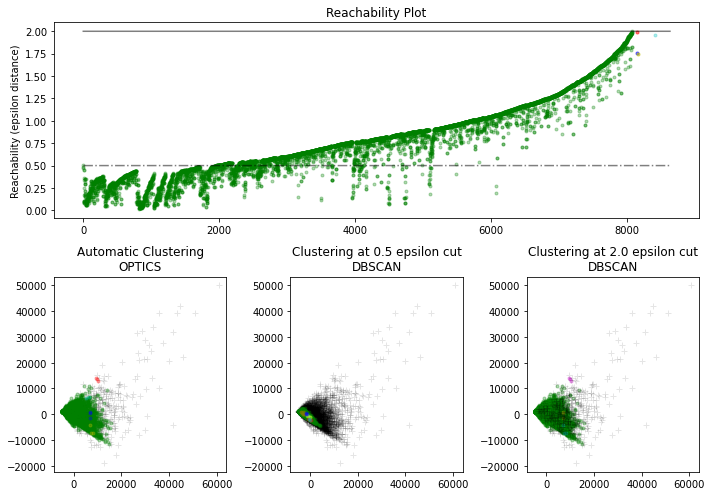

In [14]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

pca_data = PCA(n_components=2).fit_transform(data)

def plot_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()


plot_optics(clustering)



Исследуйте работу метода OPTICS с использованием различных метрик (выберите не
менее 5 метрик)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
55
39.49745252431681


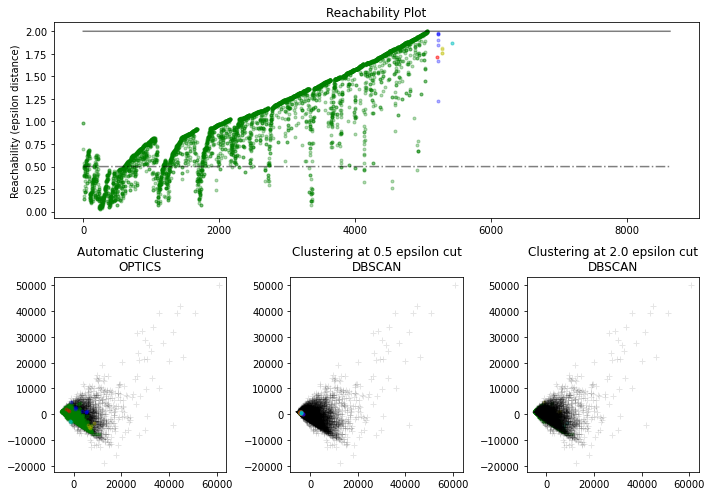

{0}
0
0.0


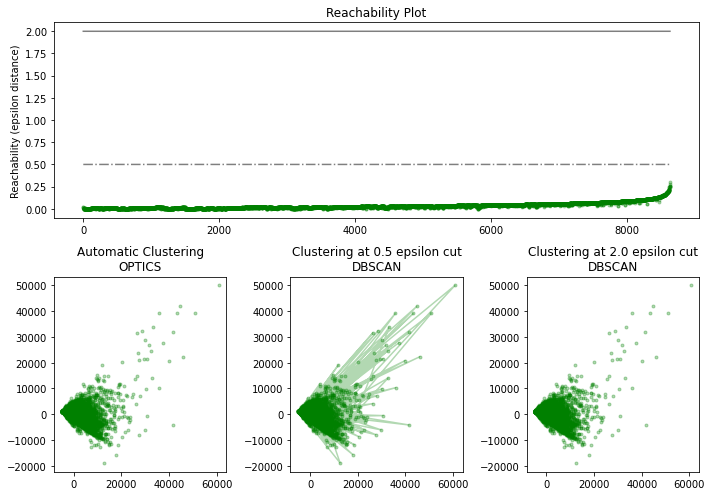

{0, 1, -1}
2
1.331635016211209


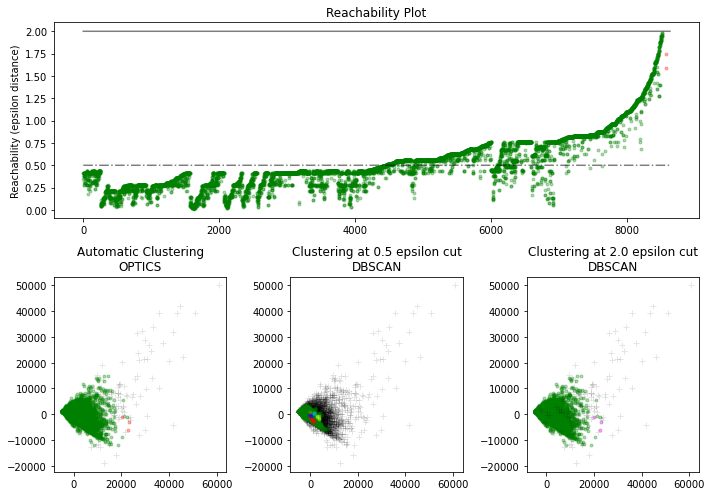

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
55
39.49745252431681


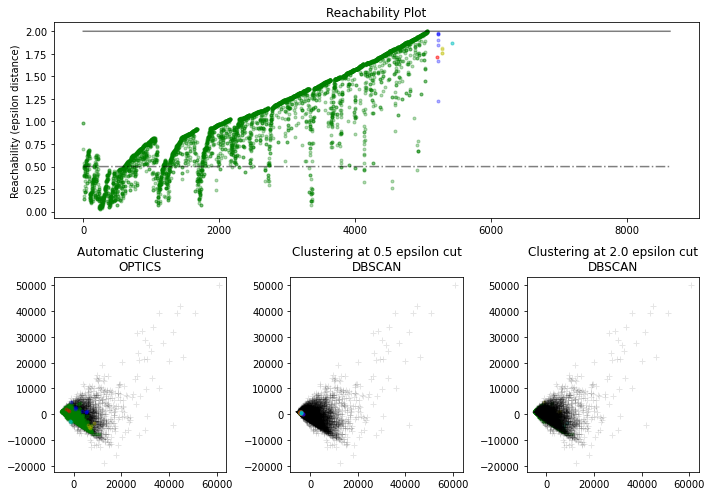

{0}
0
0.0


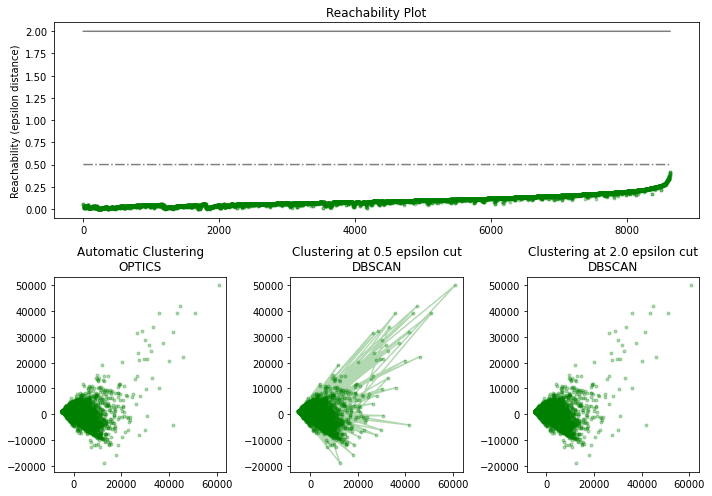

In [16]:
metrics = ['cityblock', 'cosine', 'chebyshev', 'l1', 'braycurtis']

for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1,
                   cluster_method="dbscan", metric=metric).fit(scaled_data)

    print(set(clustering.labels_))
    print(len(set(clustering.labels_)) -1)
    print(100 * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

    plot_optics(clustering)
